In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el archivo Excel
file_path = '/content/drive/MyDrive/MLOps/DataColab/online_retail_II.xlsx'
df = pd.read_excel(file_path)

# Mostrar las primeras filas del dataset
df.head()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [77]:
df.isnull().sum()
df.duplicated().sum()


6865

In [78]:
null_values = df.isnull().sum()
print(null_values)


Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [79]:
df = df.drop_duplicates()



In [80]:
print(f"Duplicados después de eliminar: {df.duplicated().sum()}")


Duplicados después de eliminar: 0


In [81]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107833
Country,0


In [82]:
df = df.dropna(subset=['Description'])


In [83]:
print(df.dtypes)


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


In [84]:
df = df.dropna(subset=['Description'])


In [85]:
df = df.dropna(subset=['Customer ID'])


In [86]:
print(df.isnull().sum())


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [87]:
df['Customer ID'] = df['Customer ID'].astype(int)


In [88]:
print(df.dtypes)


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int64
Country                object
dtype: object


In [89]:
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]


In [90]:
print(f"Registros con Quantity <= 0: {df[df['Quantity'] <= 0].shape[0]}")
print(f"Registros con Price <= 0: {df[df['Price'] <= 0].shape[0]}")


Registros con Quantity <= 0: 0
Registros con Price <= 0: 0


In [91]:
df['TotalPrice'] = df['Quantity'] * df['Price']


In [92]:
print(f"Número de registros: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")


Número de registros: 400916
Número de columnas: 9


In [93]:
print(df.isnull().sum())


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64


In [94]:
sales_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print(sales_by_country.head(10))


Country
United Kingdom    7381644.433
EIRE               356041.860
Netherlands        268784.350
Germany            202025.391
France             146107.070
Sweden              53147.990
Denmark             50906.850
Spain               47568.650
Switzerland         43921.390
Australia           31446.800
Name: TotalPrice, dtype: float64


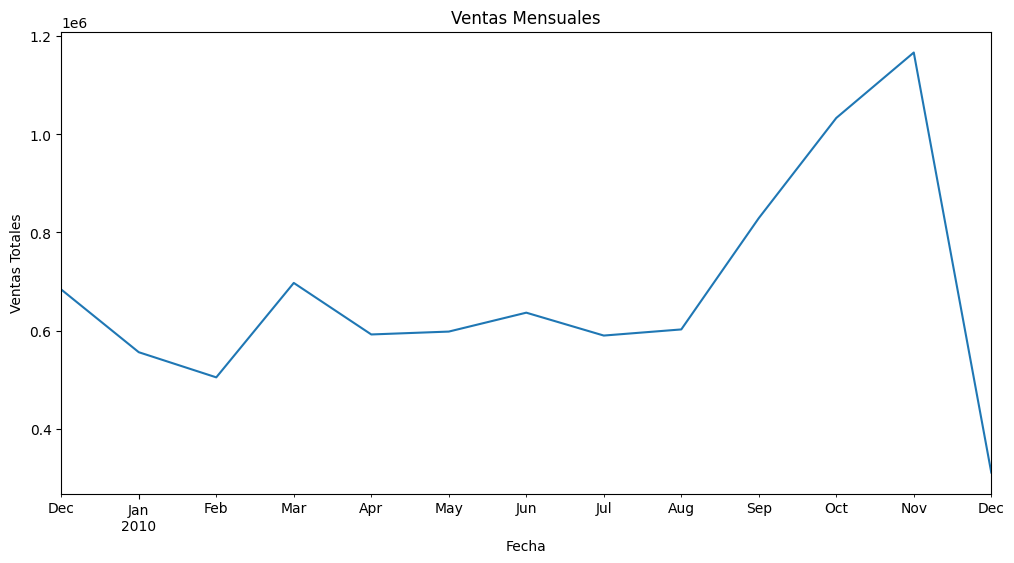

In [95]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)

monthly_sales = df['TotalPrice'].resample('M').sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.show()


In [96]:
df.to_csv('clean_online_retail.csv', index=False)


In [97]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)


Description
WHITE HANGING HEART T-LIGHT HOLDER    56814
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54610
BROCADE RING PURSE                    48166
PACK OF 72 RETRO SPOT CAKE CASES      45129
ASSORTED COLOUR BIRD ORNAMENT         44431
60 TEATIME FAIRY CAKE CASES           35656
PACK OF 60 PINK PAISLEY CAKE CASES    30871
JUMBO BAG RED RETROSPOT               29519
SMALL POPCORN HOLDER                  25703
BLACK AND WHITE PAISLEY FLOWER MUG    25685
Name: Quantity, dtype: int64


In [98]:
sales_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print(sales_by_country.head(10))


Country
United Kingdom    7381644.433
EIRE               356041.860
Netherlands        268784.350
Germany            202025.391
France             146107.070
Sweden              53147.990
Denmark             50906.850
Spain               47568.650
Switzerland         43921.390
Australia           31446.800
Name: TotalPrice, dtype: float64


In [99]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price',
       'Customer ID', 'Country', 'TotalPrice'],
      dtype='object')


In [100]:
# Calcular métricas RFM (solo Frequency y MonetaryValue)
rfm = df.groupby('Customer ID').agg({
    'Invoice': 'nunique',      # Frecuencia: Número de facturas únicas
    'TotalPrice': 'sum'        # Valor Monetario: Suma de las compras
})

# Renombrar columnas
rfm.rename(columns={
    'Invoice': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}, inplace=True)

# Mostrar las primeras filas
print(rfm.head())


             Frequency  MonetaryValue
Customer ID                          
12346               11         372.86
12347                2        1323.32
12348                1         222.16
12349                3        2671.14
12351                1         300.93


In [101]:
from sklearn.preprocessing import StandardScaler

# Normalizar las métricas RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [102]:
# Si aún no has importado joblib, hazlo ahora
import joblib

# Guardar el scaler ajustado en un archivo
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

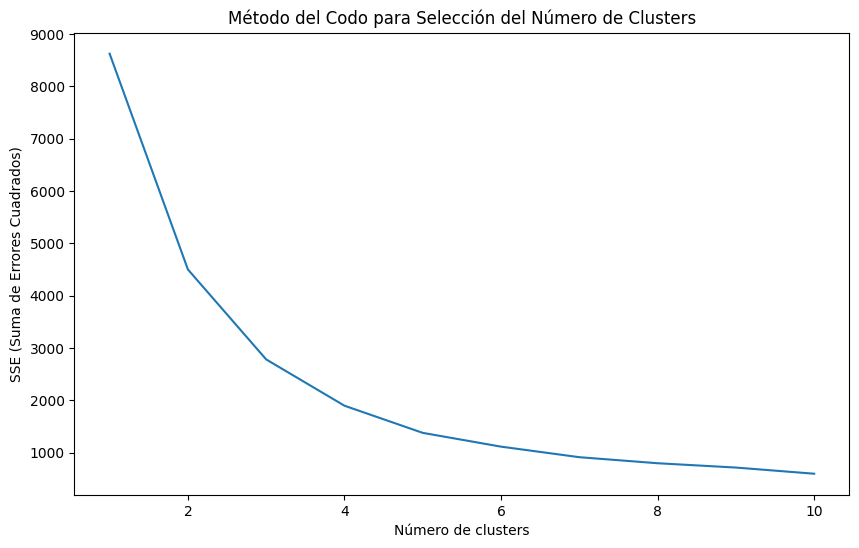

In [103]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Método del codo para encontrar el número óptimo de clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

# Graficar el método del codo
plt.figure(figsize=(10,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SSE (Suma de Errores Cuadrados)")
plt.title("Método del Codo para Selección del Número de Clusters")
plt.show()


In [104]:
# Aplicar K-Means con el número óptimo de clusters (ajusta el número de clusters según el resultado del codo)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [105]:
# Agrupar por cluster y calcular las métricas promedio
cluster_analysis = rfm.groupby('Cluster').mean()
print(cluster_analysis)


          Frequency  MonetaryValue
Cluster                           
0          3.212500    1151.907331
1        118.100000   66250.547000
2         21.260274   12063.177046
3         89.666667  264703.530000


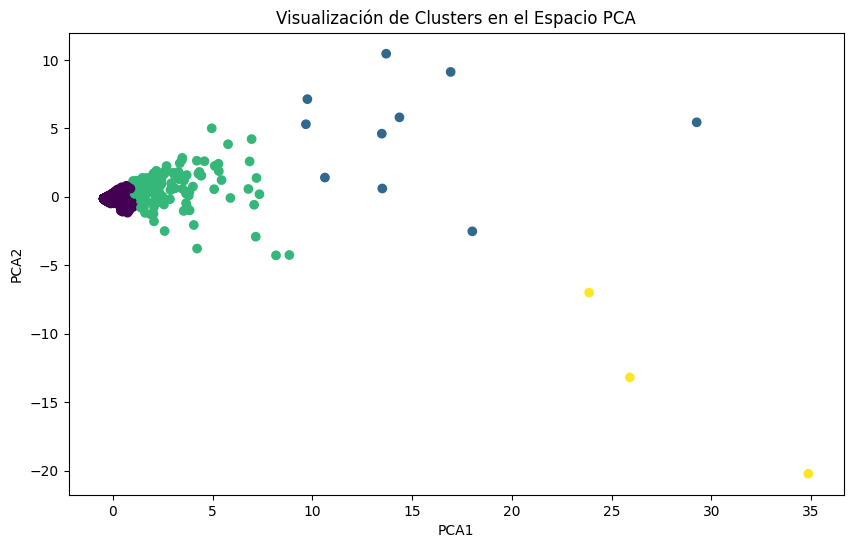

In [106]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(rfm_scaled)

# Crear un DataFrame con los resultados de PCA y los clusters
rfm['PCA1'] = principalComponents[:, 0]
rfm['PCA2'] = principalComponents[:, 1]

# Graficar los clusters
plt.figure(figsize=(10,6))
plt.scatter(rfm['PCA1'], rfm['PCA2'], c=rfm['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualización de Clusters en el Espacio PCA')
plt.show()


In [107]:
import joblib

# Guardar el modelo
joblib.dump(kmeans, 'kmeans_model.joblib')


['kmeans_model.joblib']

In [108]:
rfm.to_csv('rfm_clusters.csv', index=False)


In [109]:
# Supongamos que ya has entrenado el modelo y ajustado el scaler
import joblib

# Guardar el modelo
joblib.dump(kmeans, 'kmeans_model.joblib')




['kmeans_model.joblib']